# Exploratory Data Analysis (EDA) for Disney Movies

Data source: https://www.kaggle.com/prateekmaj21/disney-movies

In [11]:
# Import libraries

import numpy as np
import pandas as pd
import missingno as msno
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from pylab import rcParams

# Start plotly offline mode for notebooks
py.init_notebook_mode(connected=True)

# Seaborn and matplotlib configuration
sns.set_style(style='ticks')
sns.set_style(style='darkgrid')
sns.color_palette("Set2")
rcParams['figure.figsize'] = 12, 8  # Ejemplo de ajuste de propiedades con pylab

In [12]:
# Uploading the dataframe

df = pd.read_csv("C:/Users/mica_/OneDrive/Escritorio/Cursos/Anàlisi de dades BA/Prácticas/Proyectos/EDA - Disney Movies/disney_movies.csv", sep=",")
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [13]:
# Let’s separate the year from the column “release_date” in our dataframe:

df['year']=pd.DatetimeIndex(df['release_date']).year
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


## Meeting the data

In [14]:
# Number of lines and columns

print(df.shape)

(579, 7)


In [15]:
# Data types and information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
 6   year                      579 non-null    int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 29.5+ KB


In [16]:
# Stats

df.describe()

,total_gross,inflation_adjusted_gross,year
count,5.790000e+02,5.790000e+02,579.000000
mean,6.470179e+07,1.187625e+08,1998.012090
std,9.301301e+07,2.860853e+08,11.410924
min,0.000000e+00,0.000000e+00,1937.000000
25%,1.278886e+07,2.274123e+07,1993.000000
50%,3.070245e+07,5.515978e+07,1998.000000
75%,7.570903e+07,1.192020e+08,2006.000000
max,9.366622e+08,5.228953e+09,2016.000000


## Treatment and Cleaning

<Axes: >

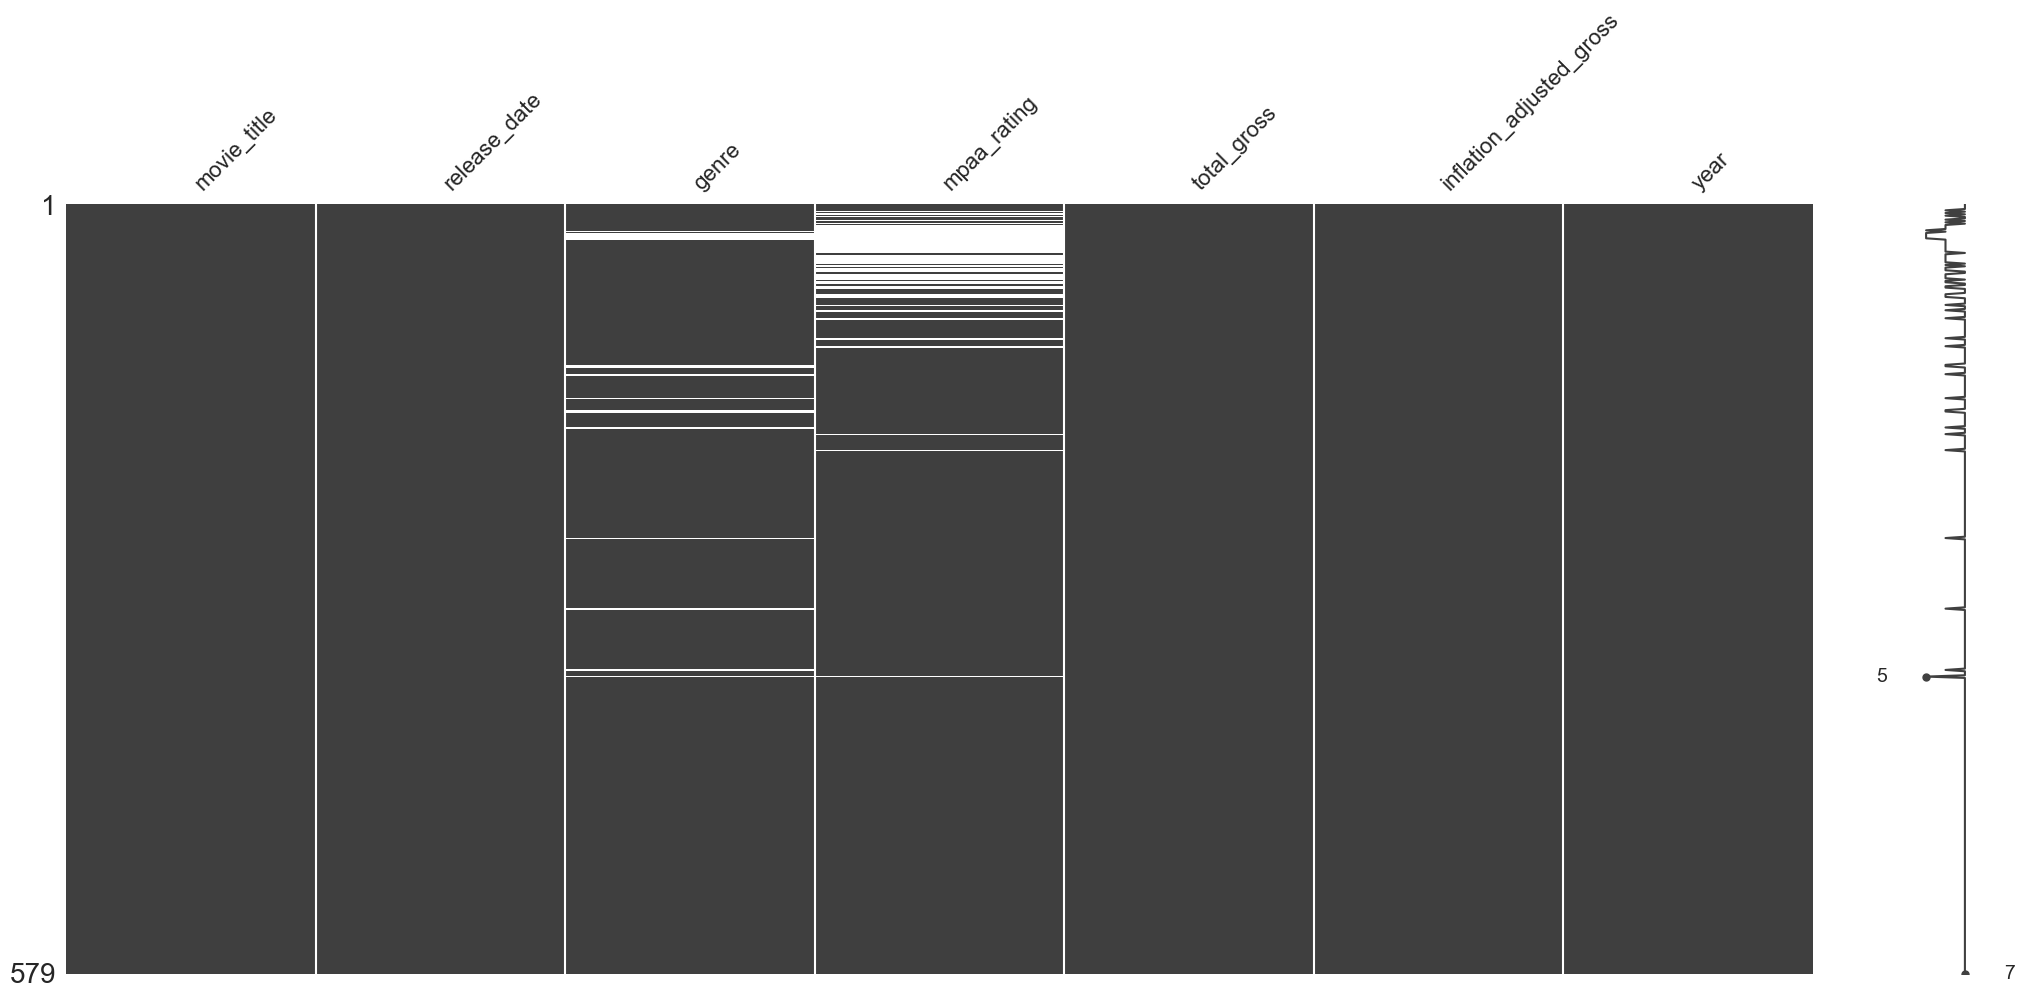

In [17]:
msno.matrix(df)

With this graph we can see that there are some null values in genre and mpaa_rating columns.

In [18]:
# Summing the null columns in the dataframe:

df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
year                         0
dtype: int64

First, let's analyze if we need to clean these null values.

In [19]:
df_null_genre = df[df['genre'].isnull()]
df_null_genre.head(17)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0,1977
22,Herbie Goes to Monte Carlo,1977-06-24,NaN,NaN,28000000,105847527,1977
23,The Black Hole,1979-12-21,NaN,NaN,35841901,120377374,1979
24,Midnight Madness,1980-02-08,NaN,NaN,2900000,9088096,1980
25,The Last Flight of Noah’s Ark,1980-06-25,NaN,NaN,11000000,34472116,1980
26,The Devil and Max Devlin,1981-01-01,NaN,NaN,16000000,48517980,1981
121,Newsies,1992-04-08,NaN,PG,2706352,5497481,1992
122,Passed Away,1992-04-24,NaN,PG-13,4030793,8187848,1992
128,A Gun in Betty Lou's Handbag,1992-08-21,NaN,PG-13,3591460,7295423,1992
146,Bound by Honor,1993-04-16,NaN,R,4496583,9156084,1993


We decide to conserve this data, despite the null values.

In [20]:
# Make the same analysis for null values in mpaa_rating

df_null_mpaa_rating = df[df['mpaa_rating'].isnull()]
df_null_mpaa_rating.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994,1954
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832,1959
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574,1961
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353,153870834,1963
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050,138612686,1968


Like the mpaa rating is it not a very relevant variable to our analysis, we decided to left the data with null values.

## Analyzing duplicates

In [21]:
df.duplicated().sum()

0

The dataframe have none duplicate value.

## Analyzing the categorical variables

- Analyzing the variable Genre:

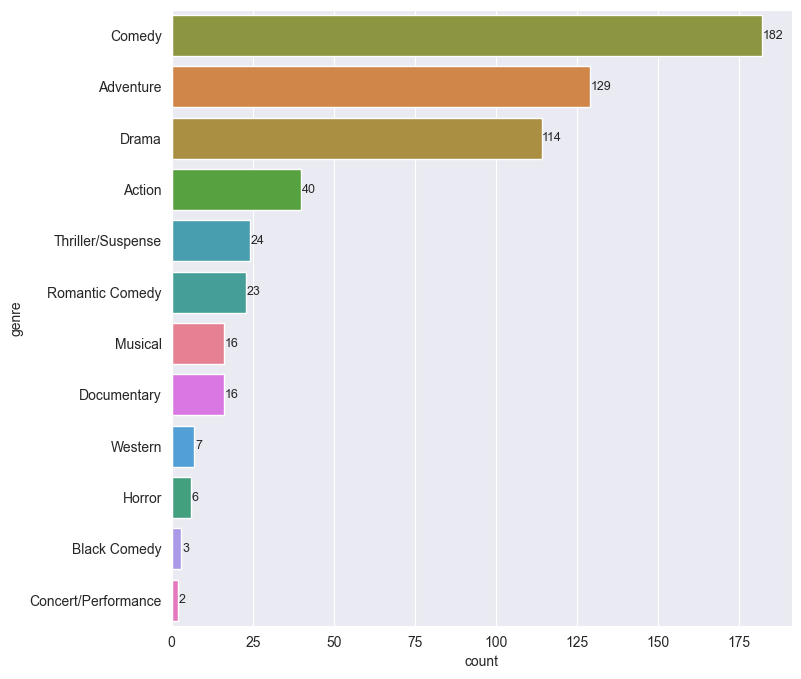

In [22]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, hue='genre', legend=False )

# Adding values at the end of each bar
for p in ax.patches:
    ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2, int(p.get_width()), 
            va='center', ha='left', fontsize= 9)
    
plt.show()

As we can see, the genre with most films is Comedy.

- Analyzing the Motion Picture Association film rating:

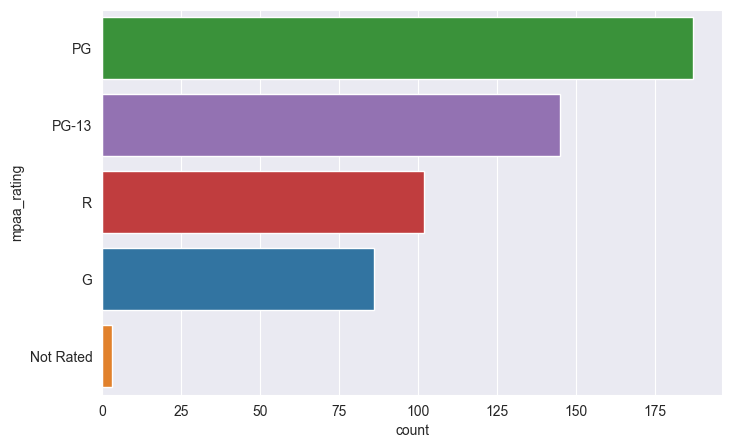

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(y='mpaa_rating', data=df, order=df['mpaa_rating'].value_counts().index, hue='mpaa_rating', legend=False)
plt.show()

“PG” mpaa rating is in the almost of Disney movies.

## Analyzing the numeric variables

- Genre vs. Total Gross:

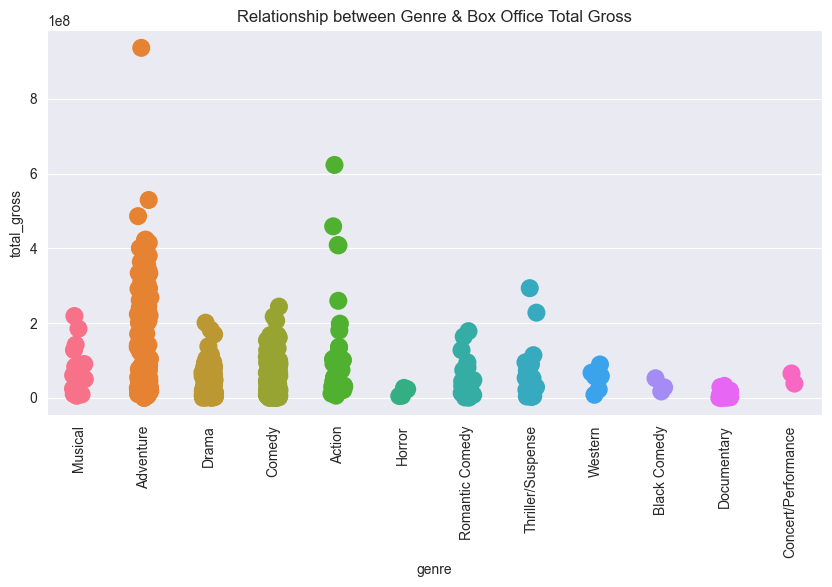

In [67]:
plt.figure(figsize=(10,5))
stripplot = sns.stripplot(x='genre', y='total_gross', data=df, s=13, hue= 'genre', legend=False)
plt.xticks(rotation=90)
stripplot.set_title('Relationship between Genre & Box Office Total Gross')
plt.show()

Analyzing the graph above we can see that the highest box office gross is correlationated by Adventure Movies and, to a lesser extent, with Action genre films.

## Analyzing the Box office total gross distribution

Text(0.5, 1.0, 'total_gross')

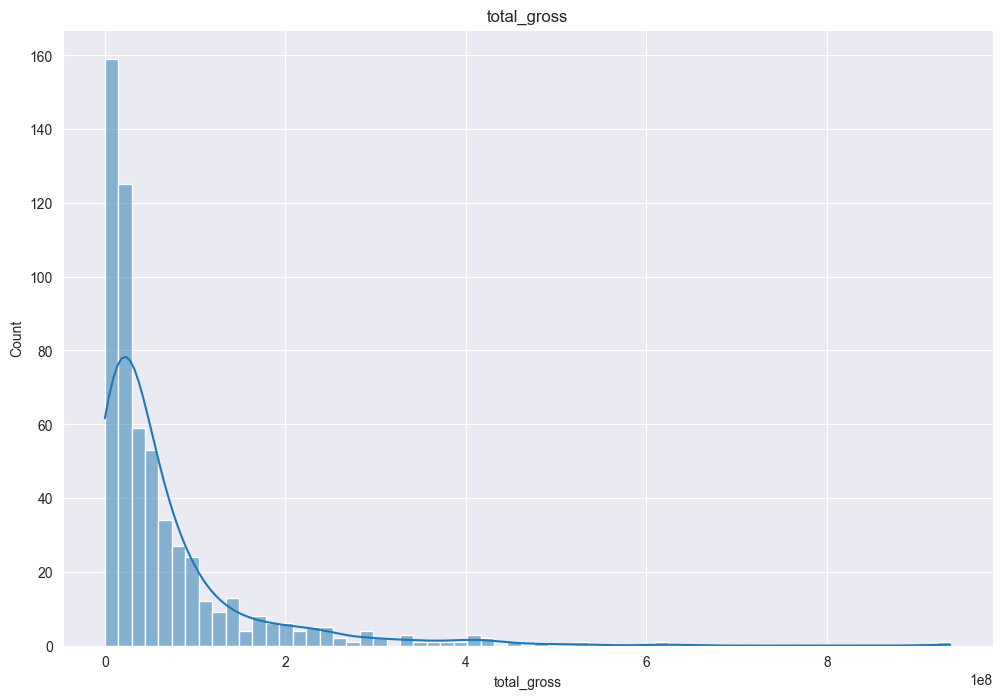

In [25]:
sns.histplot(df['total_gross'], kde=True).set_title('total_gross')

In [26]:
# Boxplot with Plotly

trace0 = go.Box(x=df['total_gross'], name='Total Gross Movies')

data = [trace0]
iplot(data)

Looking at the boxplot, we can see that the distribution of Box office total gross movies is concentred between 12.00000 and 75.00000. We have a minimum of 0 (probably a mistake) and a maximum with the outlier 936.6622. Let's find out more about this data.

## Analyzing outliers

In [27]:
df[(df['total_gross'] > 900000000)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015


In [28]:
df[(df['total_gross']==0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0,1977
27,Amy,1981-03-20,Drama,NaN,0,0,1981
29,Condorman,1981-08-07,Action,NaN,0,0,1981
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0,2002


This data is inconsistent. Let's replace this null values by the median value of total gross variable. We choose the median instead of the mean because of the outliers.

## Replacing null values

In [29]:
df.total_gross.median()

30702446.0

In [30]:
df.loc[df['total_gross'] == 0, 'total_gross'] = 30702446

In [31]:
df[(df['total_gross']==0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year


## Analyzing Boxplot: Total_gross vs Genre

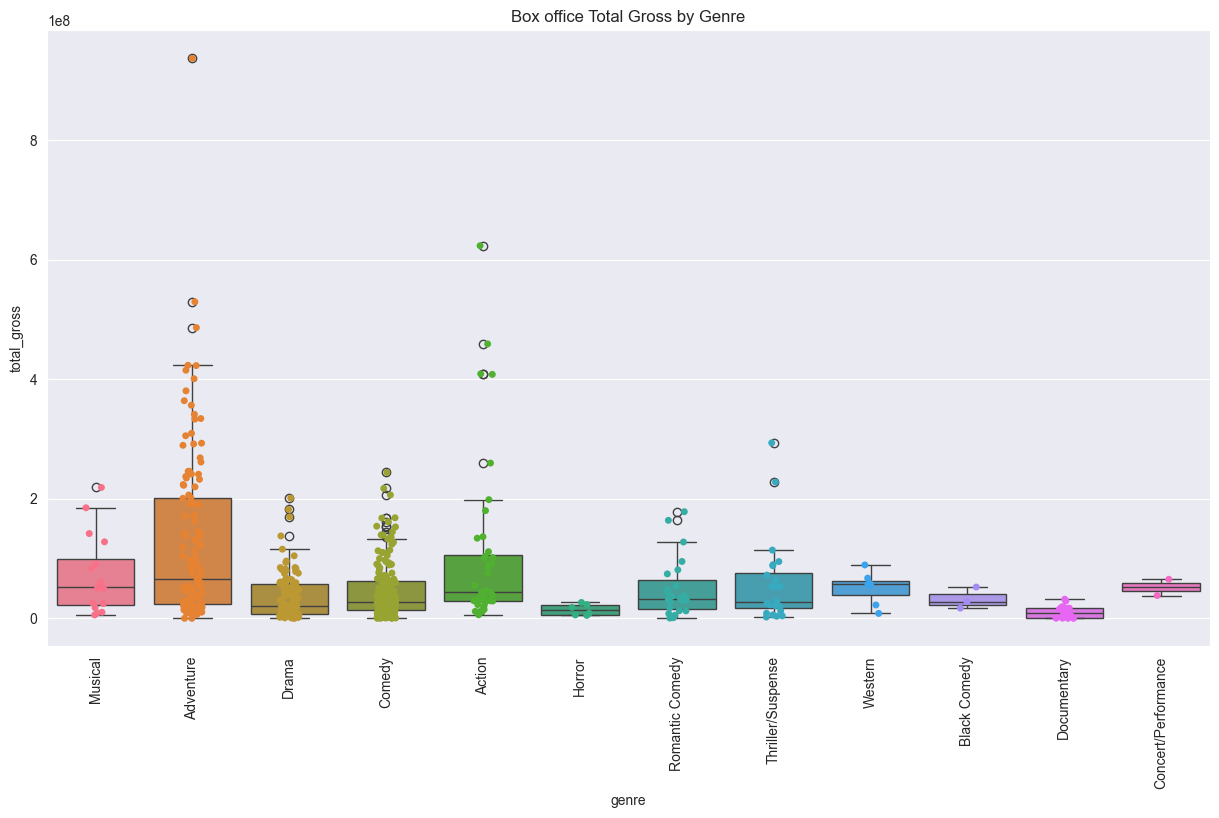

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(x='genre', y='total_gross', data=df, hue='genre', legend=False)
sns.stripplot(x='genre', y='total_gross', data=df, jitter=True, edgecolor='auto', hue='genre', legend=False)
plt.xticks(rotation=90)
plt.title('Box office Total Gross by Genre')
plt.show()

As we saw previously in the stripplot, this boxplot visualization per genre show us that the highest box office total gross belongs to Adventure genre.

## Analyzing the distribution of inflation adjusted gross:

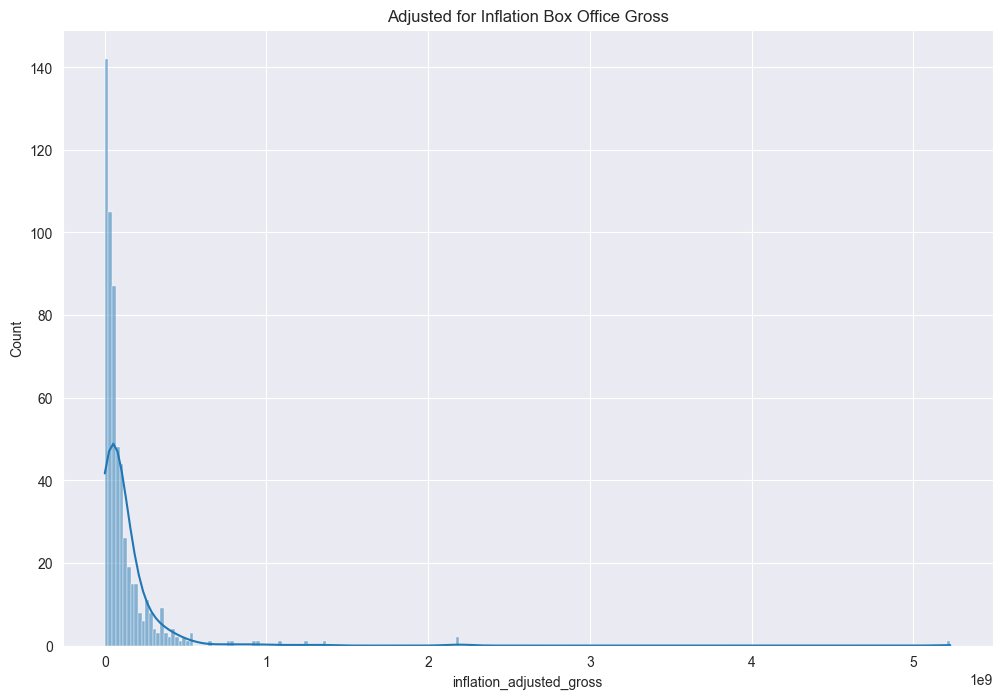

In [71]:
sns.histplot(df['inflation_adjusted_gross'], kde=True).set_title('Adjusted for Inflation Box Office Gross')
plt.show()

In [72]:
trace0 = go.Box(x=df.inflation_adjusted_gross, name = 'Adjusted by Inflation Box office Gross')

data = [trace0]
iplot(data)

Here we can see that the distribution of inflation adjusted gross is less than the distribution of total gross. And we have some outliers.
Let’s see who is the biggest inflation adjusted gross movie:

In [35]:
df[(df['inflation_adjusted_gross'] >= 5000000000)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937


Snow White and the Seven Dwarfs is the biggest inflation adjusted gross movie, probably because the making and release years are between the two great world wars.

Like total_gross variable, the variable inflation_adjusted_gross have zero value as a mininum too. Let's check wich film has this value error.

In [36]:
df[(df['inflation_adjusted_gross']==0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,30702446,0,1977
27,Amy,1981-03-20,Drama,NaN,30702446,0,1981
29,Condorman,1981-08-07,Action,NaN,30702446,0,1981
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,30702446,0,2002


Let’s do the same step done before for the total_gross variable. Replacing the null values by median:

In [37]:
df.inflation_adjusted_gross.median()

55159783.0

In [38]:
df.loc[df['inflation_adjusted_gross']==0,'inflation_adjusted_gross']=55159783

In [39]:
df[(df['inflation_adjusted_gross']==0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year


Data replaced.

## Analyzing Boxplot: Inflation_adjusted_gross vs Genre

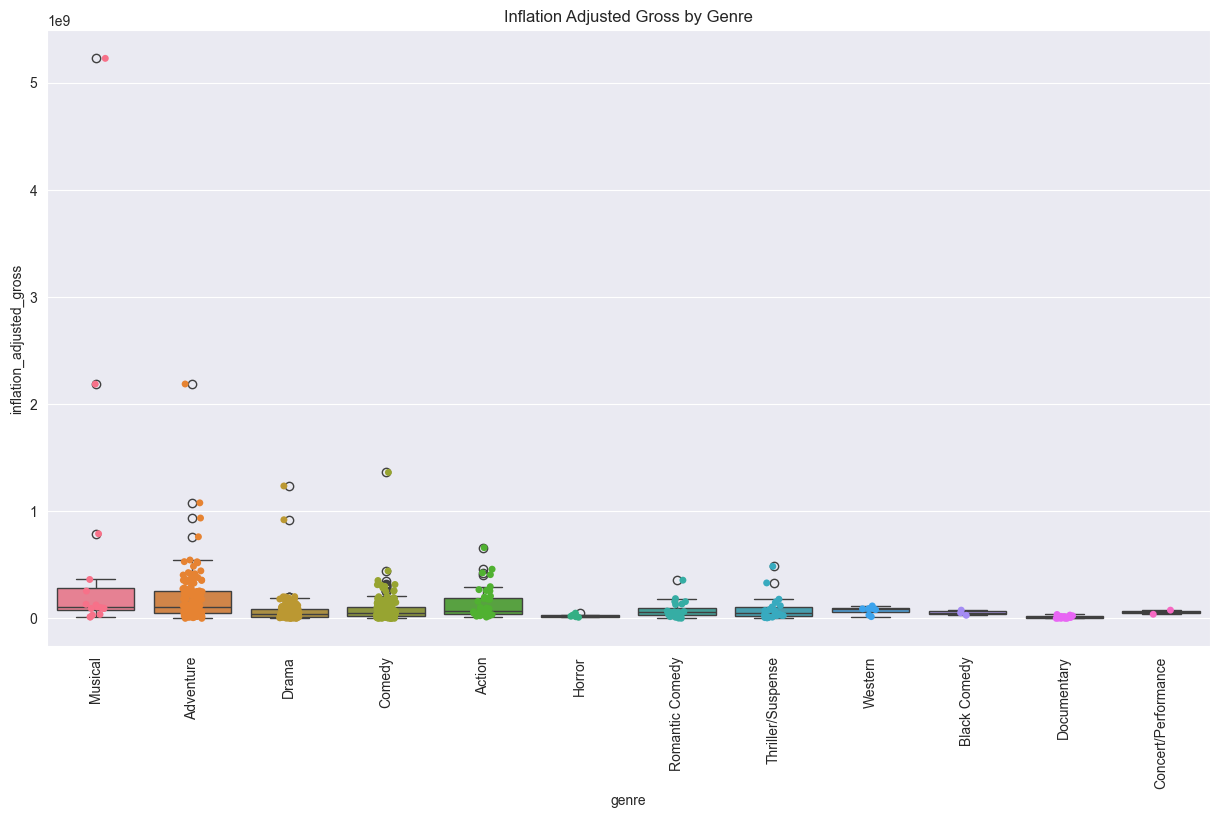

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='genre', y='inflation_adjusted_gross', data=df, hue='genre', legend=False)
sns.stripplot(x='genre', y='inflation_adjusted_gross', data=df, jitter=True, edgecolor='auto', hue='genre', legend=False)
plt.xticks(rotation=90)
plt.title('Inflation Adjusted Gross by Genre')
plt.show()

## Analyzing release year

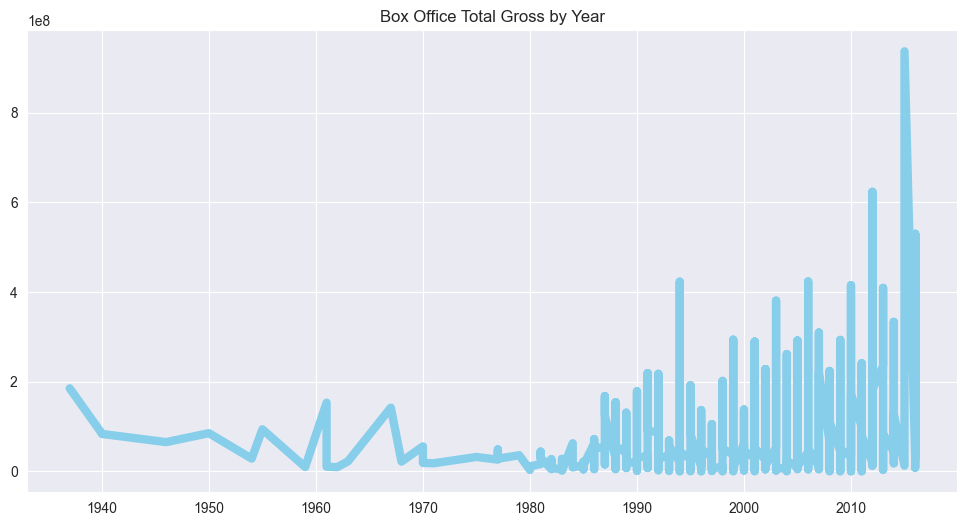

In [73]:
plt.figure(figsize=(12,6))
plt.plot('year', 'total_gross', data=df, linewidth=6, color='skyblue')
plt.title('Box Office Total Gross by Year')
plt.show()


We can see how the Box office total gross was very unstable until 1980 and from here on there is a clear long-term increasing trend.

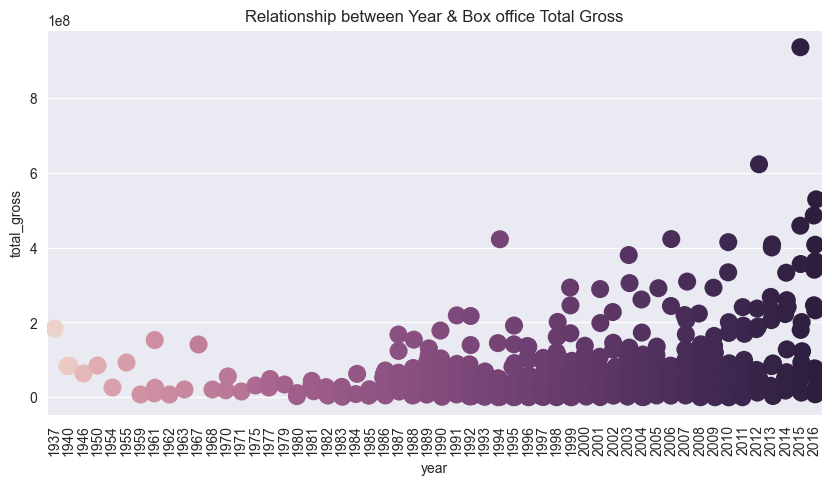

In [74]:
plt.figure(figsize=(10,5))
stripplot = sns.stripplot(x='year', y='total_gross', data=df, s=13, hue= 'year', legend=False)
plt.xticks(rotation=90)
stripplot.set_title('Relationship between Year & Box office Total Gross')
plt.show()

In the 80’is the number of film productions started to grow. Analyzing the graph, we can see that the films begin to grow grossing in begin of 90’s. The 90’s was an important year, we can see that was in 1995 when Disney had their record highest-grossing since 1937. We can see that the decade with the highest-grossing is the 2010's.

Let’s use the pair plot to see both distribution of single variables and relationships between they:

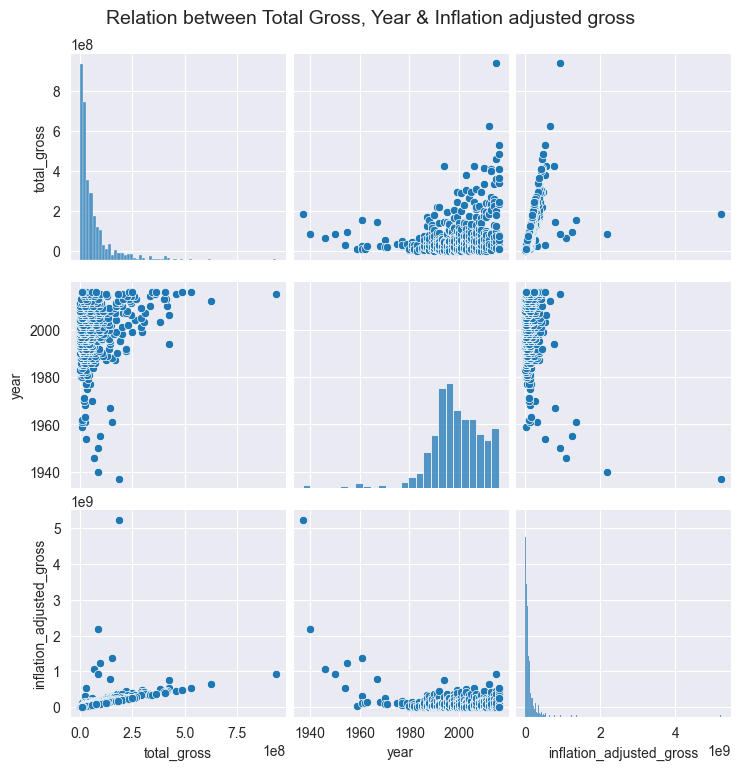

In [75]:
pair_plot = sns.pairplot(data =df, vars=['total_gross', 'year', 'inflation_adjusted_gross'])
pair_plot.figure.suptitle('Relation between Total Gross, Year & Inflation adjusted gross', y=1.02, fontsize=14)
plt.show()

This graph shows the relationship between two variables. We can see some correlations that we discovered before.


## What year have the biggest number of movies produced?

In [47]:
df_year = df.groupby(['year'], as_index=False).agg({'movie_title': 'count'}).sort_values(by='movie_title', ascending=False)
df_year.head()

,year,movie_title
32,1995,32
31,1994,30
33,1996,28
30,1993,27
34,1997,23


In [52]:
x = df_year.year
y = df_year.movie_title

trace1 = go.Bar(x=x,y=y,text=y)

data = [trace1]
iplot(data)

1995 was the year with the biggest number of movies produced by Disney, 32 movies. Let's see a sample of the movies produced that year. 

In [55]:
movies_1995 = df[(df['year']==1995)]
movies_1995.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
195,Houseguest,1995-01-06,Comedy,PG,26325256,51016522,1995
196,Bad Company,1995-01-20,Thriller/Suspense,R,3523909,6829092,1995
197,Miami Rhapsody,1995-01-27,Romantic Comedy,PG-13,5086578,9857435,1995
198,The Jerky Boys,1995-02-03,Comedy,R,7555256,14641561,1995
199,Heavy Weights,1995-02-17,Comedy,PG,17671310,34245779,1995


## Analyzing the genres produced in 1995

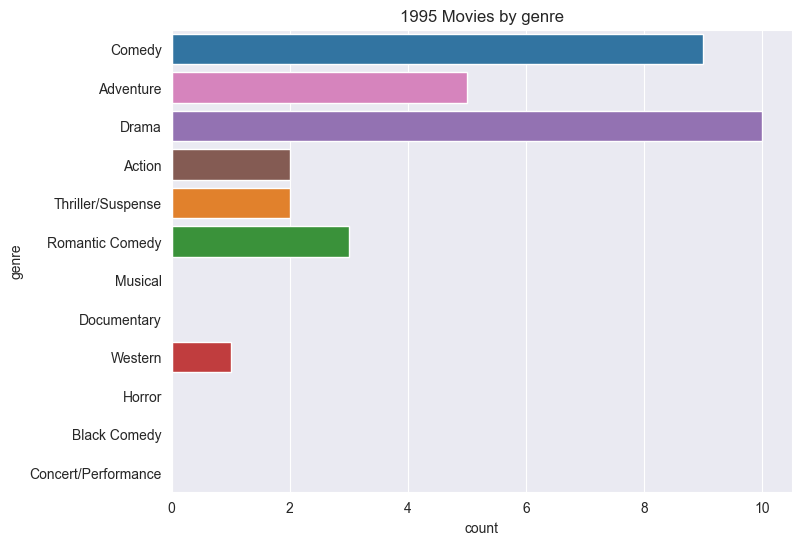

In [65]:
plt.figure(figsize=(8,6))
sns.countplot(y='genre', data=movies_1995, order=df['genre'].value_counts().index, hue='genre', legend=False)
plt.title('1995 Movies by genre')
plt.show()

Drama and Comedy were the genre more produced during 1995.

## Analyzing grossing movie vs movie in 1995

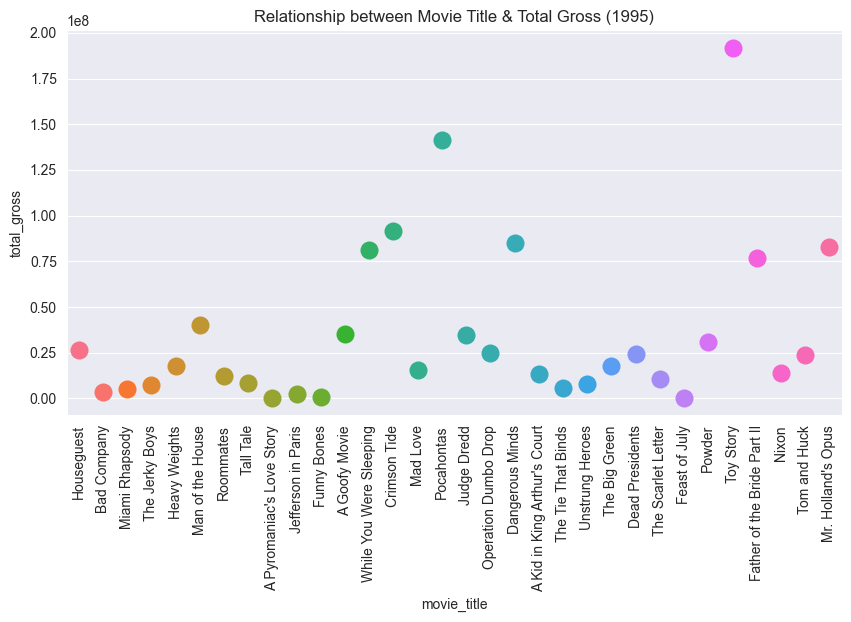

In [92]:
plt.figure(figsize=(10,5))
swarmplot = sns.swarmplot(x='movie_title', y='total_gross', data=movies_1995, s=13, hue= 'movie_title', legend=False)
plt.xticks(rotation=90)
swarmplot.set_title('Relationship between Movie Title & Total Gross (1995)')
plt.show()

As we can see, Toy Story and Pocahontas were the movies with the biggest grossing in that year.

## Analyzing 1994

- Let's analyze 1994, whose is the second year with the biggest number of movies produced.

In [83]:
movies_1994 = df[(df['year'] == 1994)]
movies_1994.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
165,The Air Up There,1994-01-07,Comedy,PG,20782439,42940186,1994
166,Cabin Boy,1994-01-07,Comedy,PG-13,3469493,7168577,1994
167,Iron Will,1994-01-14,Drama,PG,20623071,42610902,1994
168,Red Rock West,1994-01-28,NaN,R,2502551,5170709,1994
169,Blank Check,1994-02-11,Comedy,PG,30573770,63170804,1994


- Analyzing the genres produced in this year:

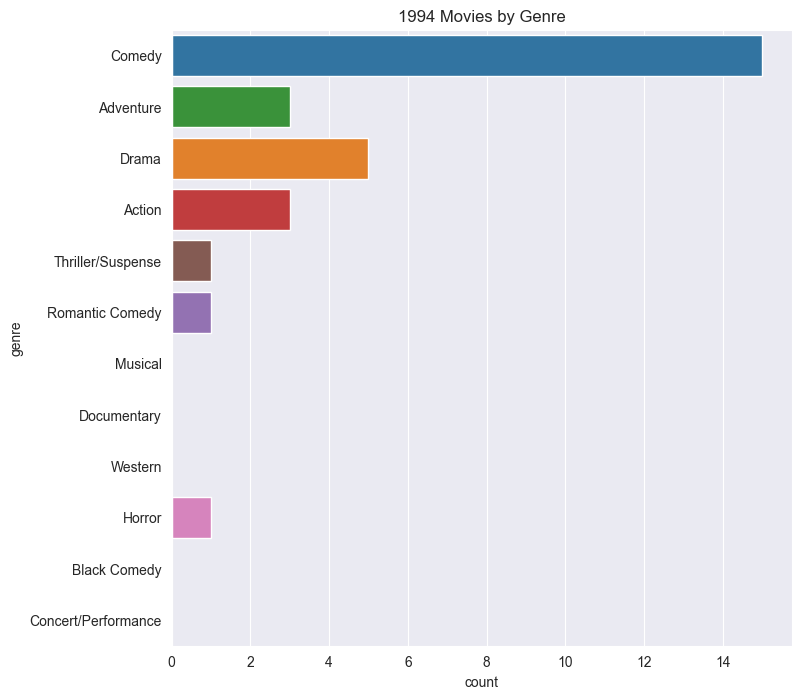

In [87]:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=movies_1994, order=df['genre'].value_counts().index, hue='genre', legend=False)
plt.title('1994 Movies by Genre')
plt.show()

Comedy was the genre more produced in 1994.

- Analyzing grossing vs movie in 1994:

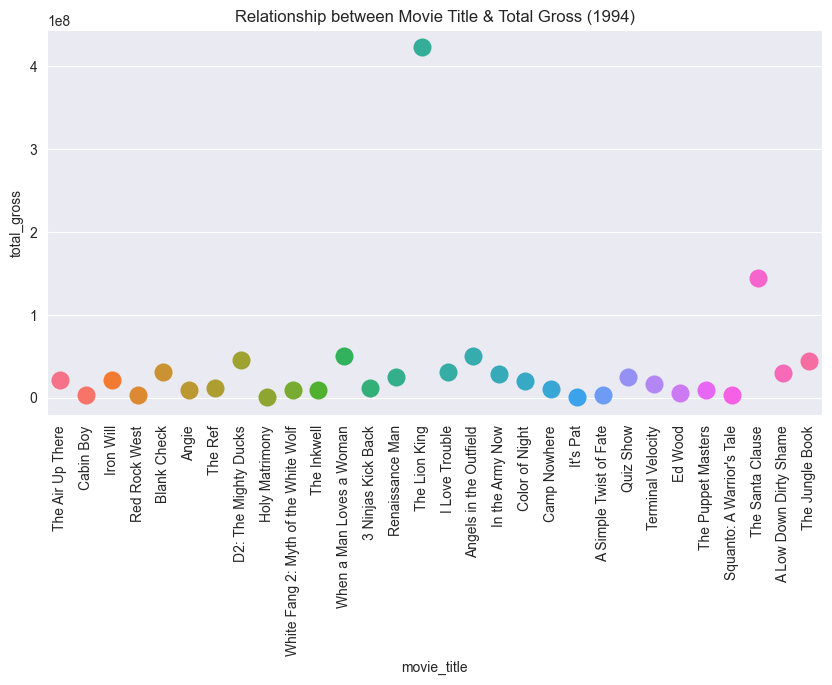

In [91]:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x='movie_title',y='total_gross',data=movies_1994, s=13, hue='movie_title', legend=False)
plt.xticks(rotation=90)
swarmplot.set_title('Relationship between Movie Title & Total Gross (1994)')
plt.show()

The Lion King was the film with the biggest grossing in 1994.

## Analyzing the top grossing movies per year

In [93]:
top_gross= df[(df['total_gross']>172000000)]

# Note that we take this number from the boxplot, it's the number when starts the outliers.

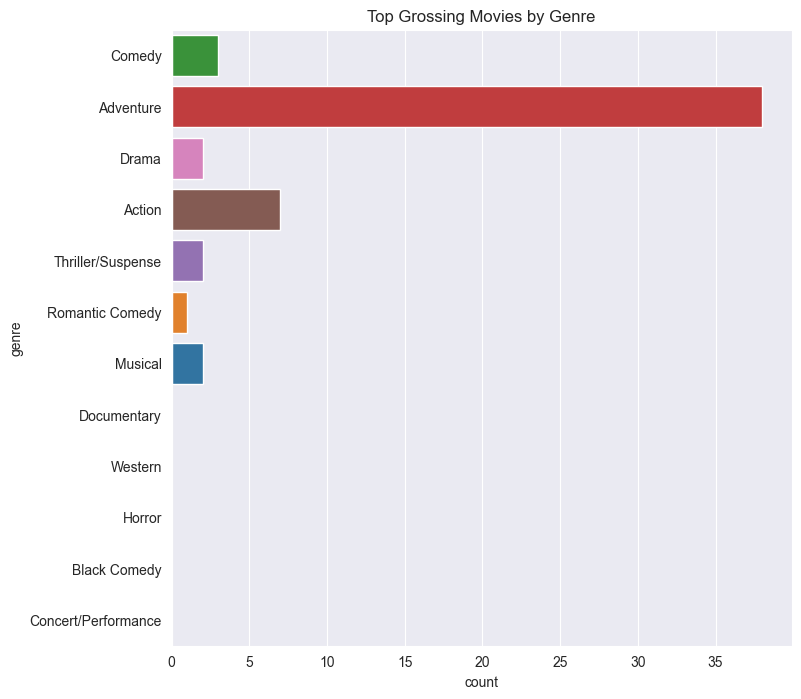

In [96]:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=top_gross, order=df['genre'].value_counts().index, hue='genre', legend=False)
plt.title('Top Grossing Movies by Genre')
plt.show()

As we saw earlier, the adventure genre is at the top of the highest grossing films. 

- Let’s analyze what movies are on this top grossing:

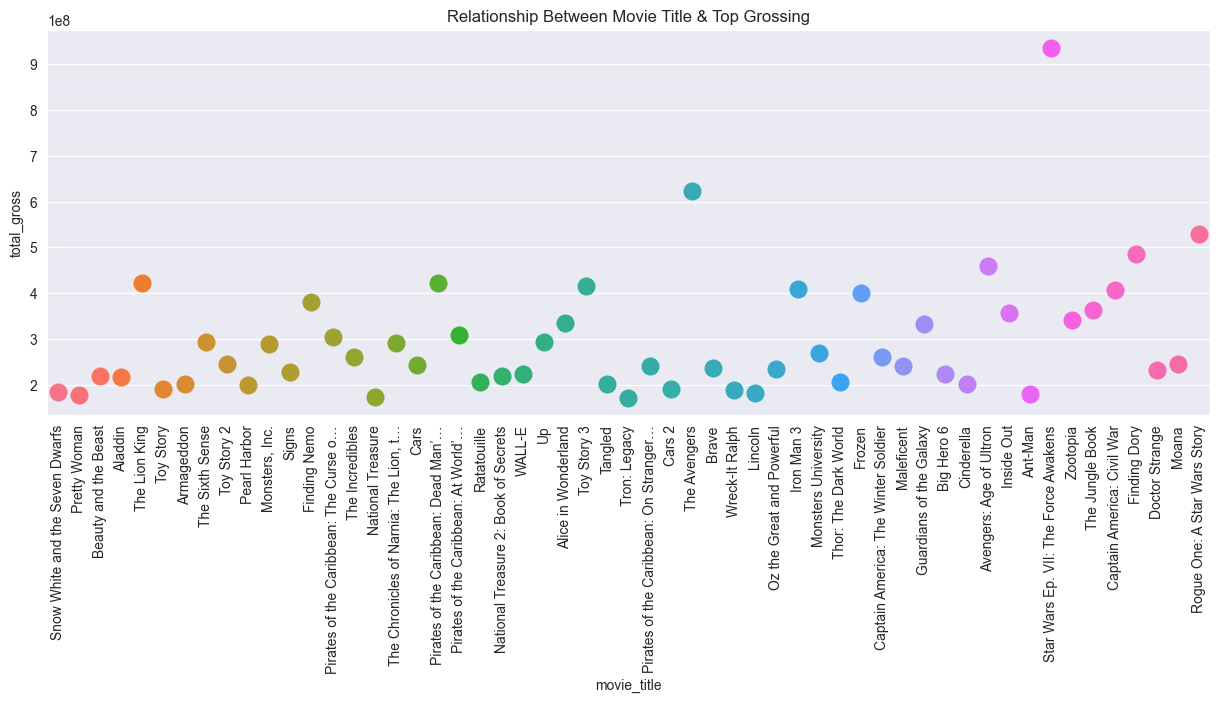

In [102]:
plt.figure(figsize=(15,5))
swarmplot=sns.swarmplot(x='movie_title',y='total_gross',data=top_gross, s=13, hue='movie_title', legend=False)
plt.xticks(rotation=90)
swarmplot.set_title('Relationship Between Movie Title & Top Grossing')
plt.show()

The top three highest-grossing Disney movies are:

1) Star Wars: Episode VII — The Force Awakens
2) The Avengers
3) Rogue One: A Star Wars Story

## Analyzing the years with the highest grossing of all time

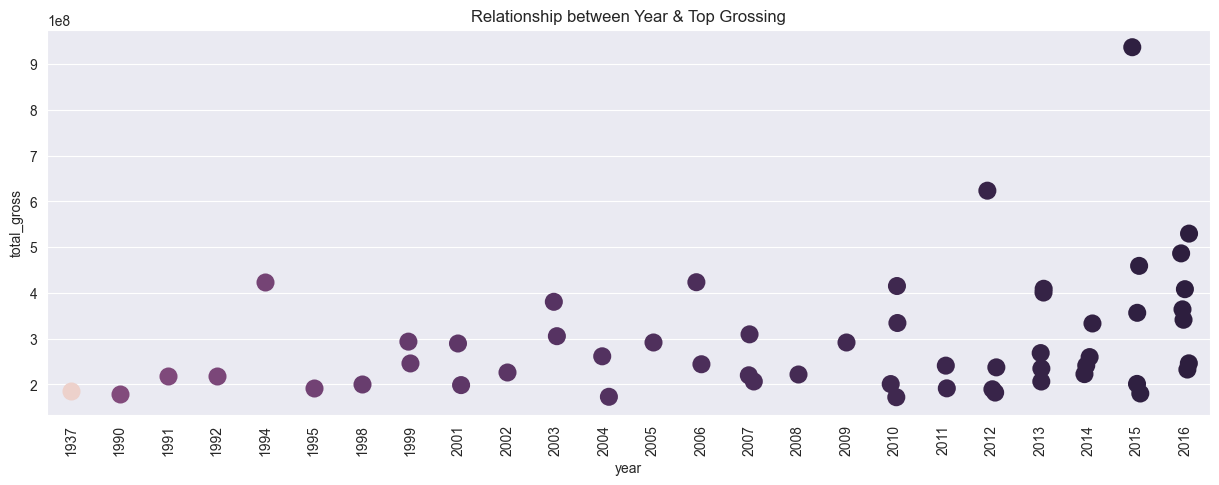

In [105]:
plt.figure(figsize=(15,5))
stripplot=sns.stripplot(x='year',y='total_gross',data=top_gross, s=13, hue='year', legend=False)
plt.xticks(rotation=90)
stripplot.set_title('Relationship between Year & Top Grossing')
plt.show()

 90’s was a new age for Disney, the grossing begin to be much higher than another decades. And it was in the end of the 80’s when Pixar was created (1989), that can contributed with the highest grossing throw the years.

## Analyzing genres per decade

In [106]:
# Let’s create a dataframe to count genres per year:

df_genre = df.groupby(['year', 'genre'], as_index=False).agg({'movie_title': 'count'}).sort_values(by='genre', ascending=False)
df_genre.head()


,year,genre,movie_title
139,2003,Western,1
87,1995,Western,1
121,2000,Western,1
147,2004,Western,2
200,2013,Western,1


In [108]:
# Let’s separte the years by decade to a better visualization:

df_genre['decade'] = ''
df_genre.loc[df_genre['year'] < 1940, 'decade'] = '30s'
df_genre.loc[(df_genre['year'] >= 1940) & (df_genre['year'] < 1950), 'decade'] = '40s'
df_genre.loc[(df_genre['year'] >= 1950) & (df_genre['year'] < 1960), 'decade'] = '50s'
df_genre.loc[(df_genre['year'] >= 1960) & (df_genre['year'] < 1970), 'decade'] = '60s'
df_genre.loc[(df_genre['year'] >= 1970) & (df_genre['year'] < 1980), 'decade'] = '70s'
df_genre.loc[(df_genre['year'] >= 1980) & (df_genre['year'] < 1990), 'decade'] = '80s'
df_genre.loc[(df_genre['year'] >= 1990) & (df_genre['year'] < 2000), 'decade'] = '90s'
df_genre.loc[(df_genre['year'] >= 2000) & (df_genre['year'] < 2010), 'decade'] = '2000s'
df_genre.loc[(df_genre['year'] >= 2010) & (df_genre['year'] < 2020), 'decade'] = '2010s'

In [112]:
# organizing the decades 

decade_order = ['30s', '40s', '50s', '60s', '70s', '80s', '90s', '2000s', '2010s']
df_genre['decade'] = pd.Categorical(df_genre['decade'], categories=decade_order, ordered=True)

Ploting genres per decade:

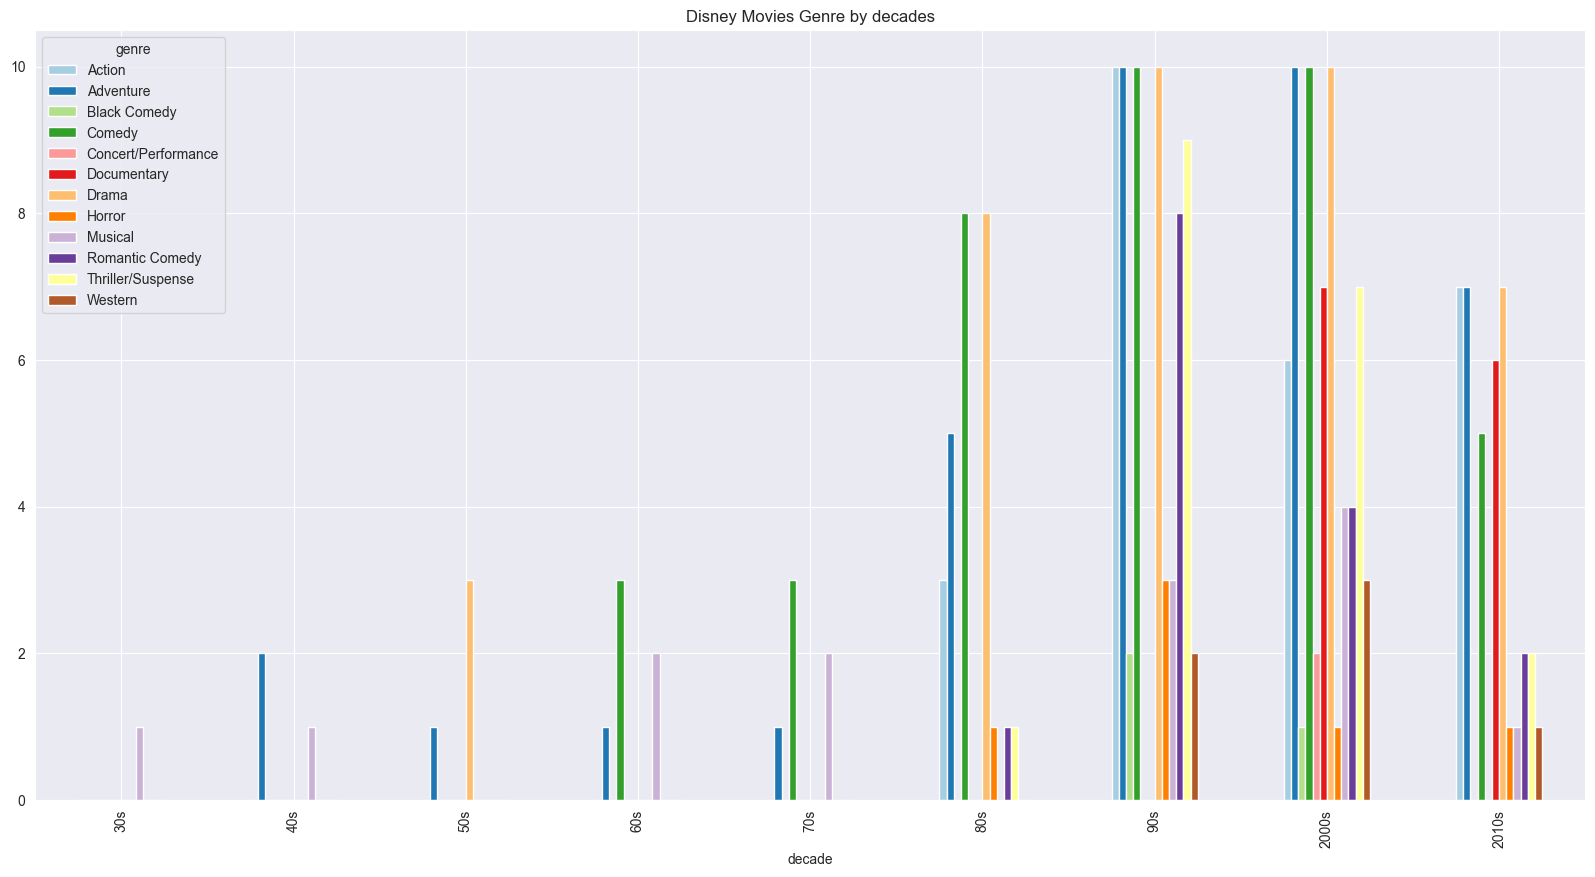

In [116]:
df_genre.groupby(['decade', 'genre'], observed=False).size().unstack().plot.bar(colormap='Paired', figsize=(20, 10))
plt.title('Disney Movies Genre by decades')
plt.show()

Comedy, Adventure and Drama are generally the genres with the most productions per decade.